# Convolutional Neural Network

- CNN is the frontend, DNN is the backend
- CNN does feature learning, DNN does classification learning
- CNN reduce the high-dimensional pixel input to low-dimensional feature representation

This notebook covers the three design pattern for CNN

- ConvNet
- VGG
- Residual Networks

## ConvNet

In [4]:
from tensorflow.keras.layers import (
    Activation,
    Conv2D,
    Dense,
    Flatten,
    MaxPooling2D,
    ReLU,
)
from tensorflow.keras.models import Sequential

### With Sequential API

In [3]:
model = Sequential()

# Frontend
model.add(
    Conv2D(
        16,
        kernel_size=(3, 3),
        strides=(2, 2),
        padding="same",
        input_shape=(128, 128, 1),
    )
)  # 1
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))  # 2
model.add(Flatten())  # 3


# Backend
model.add(Dense(256))
model.add(ReLU())
model.add(Dense(26))  # 4
model.add(Activation("softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        160       
                                                                 
 re_lu_2 (ReLU)              (None, 64, 64, 16)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 16384)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               4194560   
                                                                 
 re_lu_3 (ReLU)              (None, 256)               0         
                                                      

Observations:

1. for grayscale image, we set the input shape channel to 1
2. the size of the feature maps is reduced by pooling
3. the 2D feature maps are flattened into 1D vector before the output layer
4. for MNIST dataset, each node represents one of each letter of the English alphabets

### With shorthand syntax

> One disadvantage is `model.summary` will not show the activation layers

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [7]:
model = Sequential()
model.add(
    Conv2D(
        16,
        kernel_size=(3, 3),
        strides=(2, 2),
        padding="same",
        activation="relu",
        input_shape=(128, 128, 1),
    )
)
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())

model.add(Dense(512, activation="relu"))
model.add(Dense(26, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 16384)             0         
                                                                 
 dense_4 (Dense)             (None, 512)               8389120   
                                                                 
 dense_5 (Dense)             (None, 26)                13338     
                                                                 
Total params: 8,402,618
Trainable params: 8,402,618
Non-trainable params: 0
____________________________________________

### With Functional API

In [8]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [10]:
inputs = Input(shape=(128, 128, 1))
layer = Conv2D(
    16, kernel_size=(3, 3), strides=(2, 2), padding="same", activation="relu"
)(inputs)
layer = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(layer)
layer = Flatten()(layer)
layer = Dense(512, activation="relu")(layer)
outputs = Dense(26, activation="softmax")(layer)
model = Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 16384)             0         
                                                                 
 dense_8 (Dense)             (None, 512)               8389120   
                                                                 
 dense_9 (Dense)             (None, 26)                13338     
                                                           

## VGG Networks

Principles of VGG design pattern:
- grouping multiple convolutions into blocks, with the same number of filters
- progressively doubling the number of filters across blocks
- delaying pooling to the end of block

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

2023-03-02 16:41:37.677160: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
def conv_block(n_layers, n_filters):
    for n in range(n_layers):
        model.add(
            Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same", activation="relu")
        )
    model.add(MaxPooling2D(2, strides=2))


model = Sequential()
model.add(
    Conv2D(
        64,
        (3, 3),
        strides=(1, 1),
        padding="same",
        activation="relu",
        input_shape=(224, 224, 3),
    )
)  # 1
conv_block(1, 64)  # 2
conv_block(2, 128)
conv_block(3, 256)
conv_block(3, 512)
conv_block(3, 512)

model.add(Flatten())
model.add(Dense(4096, activation="relu"))
model.add(Dense(4096, activation="relu"))
model.add(Dense(1000, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 conv2d_2 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

1. First convolution specified separately since it requires the `input_shape` parameter
2. Second to fifth convolutional blocks

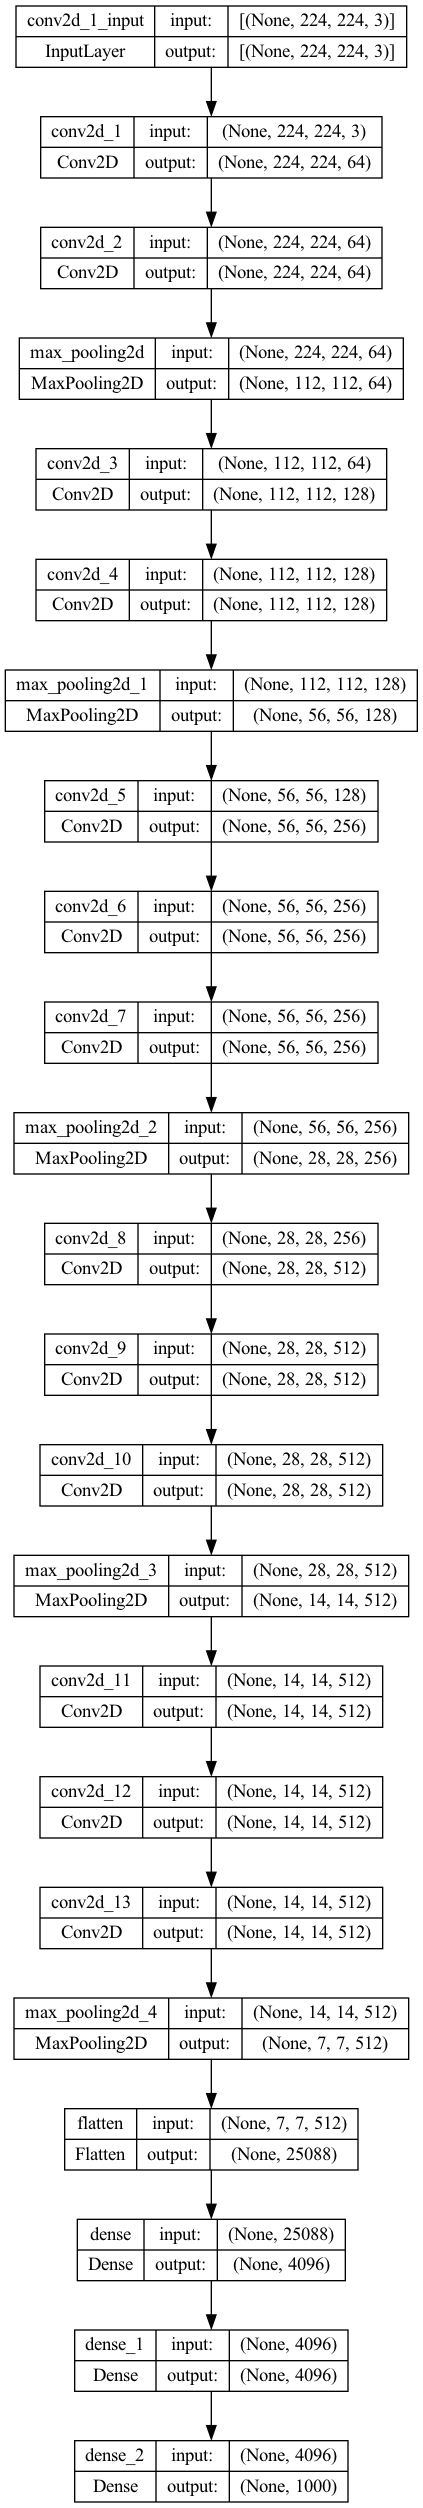

In [7]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

## ResNet

In [11]:
import tensorflow.keras.layers as layers
from tensorflow.keras import Model

In [12]:
def residual_block(n_filters, x):
    """Create a residual block of convolutions
    n_filters: number of filters
    x: input into the block"""
    shortcut = x
    x = layers.Conv2D(
        n_filters, (3, 3), strides=(1, 1), padding="same", activation="relu"
    )(x)
    x = layers.Conv2D(
        n_filters, (3, 3), strides=(1, 1), padding="same", activation="relu"
    )(x)
    x = layers.add([shortcut, x])
    return x


def conv_block(n_filters, x):
    """Create block of convolution without pooling
    n_filters: number of filters
    x: input into the block"""
    x = layers.Conv2D(
        n_filters, (3, 3), strides=(2, 2), padding="same", activation="relu"
    )(x)
    x = layers.Conv2D(
        n_filters, (3, 3), strides=(2, 2), padding="same", activation="relu"
    )(x)
    return x

In [14]:
inputs = layers.Input(shape=(224, 224, 3))
x = layers.Conv2D(
    64, kernel_size=(7, 7), strides=(2, 2), padding="same", activation="relu"
)(inputs)
x = layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding="same")(x)

for _ in range(2):
    x = residual_block(64, x)
x = conv_block(128, x)

for _ in range(3):
    x = residual_block(128, x)
x = conv_block(256, x)

for _ in range(5):
    x = residual_block(256, x)
x = conv_block(512, x)
x = residual_block(512, x)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(1000, activation="softmax")(x)
model = Model(inputs, outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_15 (Conv2D)             (None, 112, 112, 64  9472        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_5 (MaxPooling2D)  (None, 56, 56, 64)  0           ['conv2d_15[0][0]']              
                                                                                              

In [15]:
def bottleneck_block(n_filters, x):
    """Create bottleneck residual block of convolution
    n_filters: number of filters
    x: input into the block"""
    shortcut = x
    x = layers.Conv2D(
        n_filters, (1, 1), strides=(1, 1), padding="same", activation="relu"
    )(x)
    x = layers.Conv2D(
        n_filters, (3, 3), strides=(1, 1), padding="same", activation="relu"
    )(x)
    x = layers.Conv2D(
        n_filters * 4, (1, 1), strides=(1, 1), padding="same", activation="relu"
    )(x)
    x = layers.add([shortcut, x])
    return x

### ResNet 50 v1

In [16]:
import tensorflow.keras.layers as layers
from tensorflow.keras import Model

In [24]:
def identity_block(n_filters, x):
    """Create at bottleneck residual block of convolutions

    Args:
        n_filters: number of filters
        x: input into the block
    """

    shortcut = x

    x = layers.Conv2D(n_filters, (1, 1), strides=(1, 1))(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(n_filters * 4, (1, 1), strides=(1, 1))(x)
    x = layers.BatchNormalization()(x)
    x = layers.add([shortcut, x])
    x = layers.ReLU()(x)

    return x


def projection_block(n_filters, x, strides=(2, 2)):
    """Create block of convolutions with feature pooling
        Increase the number of filters by 4X

    Args:
        n_filters; number of filters
        x: input into the block
    """
    shortcut = layers.Conv2D(4 * n_filters, (1, 1), strides=strides)(x)
    shortcut = layers.BatchNormalization()(shortcut)

    x = layers.Conv2D(n_filters, (1, 1), strides=strides)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(4 * n_filters, (1, 1), strides=(1, 1))(x)
    x = layers.BatchNormalization()(x)

    x = layers.add([x, shortcut])
    x = layers.ReLU()(x)

    return x

In [25]:
inputs = layers.Input(shape=(224, 224, 3))
x = layers.ZeroPadding2D(padding=(3, 3))(inputs)
x = layers.Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding="valid")(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.ZeroPadding2D(padding=(1, 1))(x)
x = layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2))(x)

x = projection_block(64, x, strides=(1, 1))  # 1
for _ in range(2):
    x = identity_block(64, x)

x = projection_block(128, x)
for _ in range(3):
    x = identity_block(128, x)

x = projection_block(256, x)
for _ in range(5):
    x = identity_block(256, x)

x = projection_block(512, x)
for _ in range(2):
    x = identity_block(512, x)

x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(1000, activation="softmax")(x)
model = Model(inputs, outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_4[0][0]']                
 D)                                                                                               
                                                                                                  
 conv2d_46 (Conv2D)             (None, 112, 112, 64  9472        ['zero_padding2d_2[0][0]']       
                                )                                                           

1. Each convolutional group after the first group starts with a projection block.

### ResNet v2

Introduced the _preactivation batch normalization_ (BN-RE-Conv), in which the batch normalization and activation functions are placed before (instead of after) the corresponding convolution or dense layer.

In [29]:
def identity_block(n_filters: int, x):
    """Create a bottleneck residual block of convolutions

    Args:
        x: input into the block
        n_filters: number of filters
    """
    shortcut = x

    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(n_filters, (1, 1), strides=(1, 1))(x)

    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(n_filters, (3, 3), strides=(1, 1), padding="same")(x)

    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(n_filters * 4, (1, 1), strides=(1, 1))(x)

    x = layers.add([shortcut, x])

    return x